In [72]:


import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from sklearn import model_selection,preprocessing, metrics
from ClassPerceptron import Perceptron

In [73]:
datos = pd.read_csv("Lentes.csv", encoding='latin1')
print(datos.sample(10))

    Id       Edad   Prescripcion Astigmatismo  Lagrimas     Diagnostico
20  21  Presbicia  Hipermetropía           SI    Normal  No_usar_Lentes
7    8      Joven         Miopía           SI  Reducida  No_usar_Lentes
11  12  pre_presb  Hipermetropía           SI  Reducida  No_usar_Lentes
18  19  Presbicia  Hipermetropía           NO  Reducida  No_usar_Lentes
4    5      Joven  Hipermetropía           NO  Reducida  No_usar_Lentes
8    9  pre_presb  Hipermetropía           NO    Normal  Lentes_Blandos
3    4      Joven         Miopía           SI    Normal    Lentes_Duros
21  22  Presbicia         Miopía           NO  Reducida  No_usar_Lentes
6    7      Joven         Miopía           NO  Reducida  No_usar_Lentes
9   10  pre_presb         Miopía           SI    Normal    Lentes_Duros


In [74]:
mapeo = {
    "Edad":{'Joven':1, 'pre_presb':2, 'Presbicia':3},
    "Prescripcion":{'Hipermetropía':0, 'Miopía':1},
    "Astigmatismo":{"SI":1, "NO":0},
    "Lagrimas":{"Normal":1, "Reducida":0},
    "Diagnostico":{'Lentes_Blandos':1, 'Lentes_Duros':0, 'No_usar_Lentes':0}
}
datos.replace(mapeo, inplace=True)
datos.drop(columns="Astigmatismo",inplace=True)
datos.drop(columns="Lagrimas",inplace=True)
datos.head(10)

C:\Users\facus\AppData\Local\Temp\ipykernel_8836\2750386258.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.replace(mapeo, inplace=True)


,Id,Edad,Prescripcion,Diagnostico
0,1,1,0,1
1,2,1,1,1
2,3,1,0,0
3,4,1,1,0
4,5,1,0,0
5,6,1,0,0
6,7,1,1,0
7,8,1,1,0
8,9,2,0,1
9,10,2,1,0


In [75]:
datos.Diagnostico.unique()

array([1, 0], dtype=int64)

In [76]:
X = np.array(datos.iloc[:,:-1])
T = np.array(datos['Diagnostico'])  
print(T)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [77]:
normalizador= preprocessing.StandardScaler() #media y desvío
X = normalizador.fit_transform(X)
print(X)

[[-1.66132477 -1.22474487 -1.        ]
 [-1.51686175 -1.22474487  1.        ]
 [-1.37239873 -1.22474487 -1.        ]
 [-1.2279357  -1.22474487  1.        ]
 [-1.08347268 -1.22474487 -1.        ]
 [-0.93900965 -1.22474487 -1.        ]
 [-0.79454663 -1.22474487  1.        ]
 [-0.65008361 -1.22474487  1.        ]
 [-0.50562058  0.         -1.        ]
 [-0.36115756  0.          1.        ]
 [-0.21669454  0.          1.        ]
 [-0.07223151  0.         -1.        ]
 [ 0.07223151  0.         -1.        ]
 [ 0.21669454  0.         -1.        ]
 [ 0.36115756  0.          1.        ]
 [ 0.50562058  0.          1.        ]
 [ 0.65008361  1.22474487  1.        ]
 [ 0.79454663  1.22474487 -1.        ]
 [ 0.93900965  1.22474487 -1.        ]
 [ 1.08347268  1.22474487 -1.        ]
 [ 1.2279357   1.22474487 -1.        ]
 [ 1.37239873  1.22474487  1.        ]
 [ 1.51686175  1.22474487  1.        ]
 [ 1.66132477  1.22474487  1.        ]]


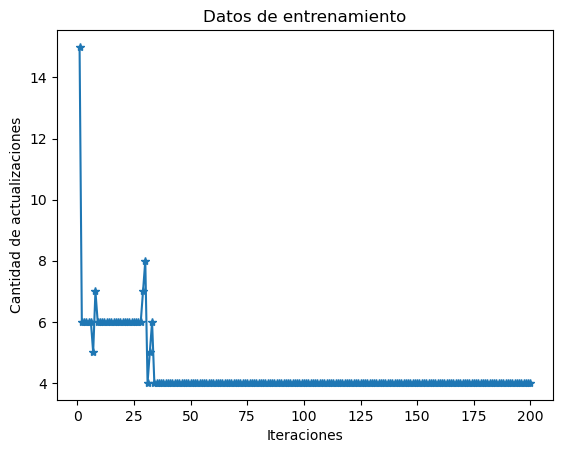

In [78]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None) #random_state=None significa que no utiliza una semilla para la generación de números aleatorios
ppn.fit(X, T)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='*')
plt.title('Datos de entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

In [79]:
Y = ppn.predict(X)
prediction = metrics.accuracy_score(Y,T)
print(prediction * 100)


91.66666666666666


In [80]:

print(datos.corr())

                    Id          Edad  Prescripcion  Diagnostico
Id            1.000000  9.436285e-01  1.083473e-01    -0.318664
Edad          0.943629  1.000000e+00  9.064933e-17    -0.125656
Prescripcion  0.108347  9.064933e-17  1.000000e+00    -0.102598
Diagnostico  -0.318664 -1.256562e-01 -1.025978e-01     1.000000
